# PRÁCTICA 2 PARTE 3 - PROCESAMIENTO DE LENGUAJE NATURAL - MASTER EN INTELIGENCIA ARTIFICIAL APLICADA

# JOSÉ LORENTE LÓPEZ - DNI: 48842308Z

# **Topic Modeliing using Gensim and Mallet**

---

Date: Nov 25, 2022

Author: Jerónimo Arenas-García (jeronimo.arenas@uc3m.es), Jesús Cid-Sueiro (jcid@ing.uc3m.es)

Version 1.1 (without Gensim preprocessing details)

---

Our goal here is to present a basic overview of the library that covers the following aspects:

   - Topic Modeling
   - Word and Document Vector Representation
   - Semantic Similarity Calculation

In [1]:
# Importamos las librerías necesarias para el desarrollo de la práctica
# Common imports 
import numpy as np
import pandas as pd
import zipfile as zp
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
#For fancy table Display
# %load_ext google.colab.data_table

## **1. What is Gensim**

---

<figure>
<center>
<img src='https://radimrehurek.com/gensim_4.0.0/_images/gensim_logo_positive_complete_tb.png' width="600"></img>
<figcaption>Source: https://radimrehurek.com/gensim_4.0.0/_images/gensim_logo_positive_complete_tb.png</figcaption></center>
</figure>

Gensim is a Python library intended for NLP practitioners. It provides a variety of methods for working with documents in textual format and carrying out semantic analysis tasks such as topic modeling or semantic comparison between documents. For this reason, Gensim is also widely used in Information Retrieval (IR) tasks.

Gensim is Open Source and is entirely programmed in Python, so it is easy to modify the code if necessary. The source code is hosted on the [Github development repository](https://github.com/RaRe-Technologies/gensim
).

Despite being fully developed in Python, Gensim makes extensive use of the Numpy and Scipy libraries that provide highly efficient implementations of certain matrix transformations and mathematical calculations, so Gensim is quite fast. For this reason, Gensim has been adopted by a large number of companies as a core components of complex NLP systems. Gensim is available for its use in the main Cloud Computing platforms (AWS, Azure, Google, etc).


Gensim es, en resumen, una librería de Python centrada en prácticas NLP. Ofrece una variedad de métodos para trabajar con docs y hacer un análisis semántico con el fin de compararlo con otros documentos o estudiar los "topics" que caracterizan al mismo. Es muy óptimo por el uso de Scipy y Numpy.

---
**Important**: 

Current Gensim version available in Colab does not support some tools designed to support third-party software, such as the Mallet wrapper, that were available in earlier versions. For this reason, this Notebook makes use of Gensim v3.8.3 since it is the last release in which this wrapper is available. It is important to update to this version, since versions prior to 3.7 contain bugs in the use of said wrapper for Mallet.

---

Utilizamos la siguiente versión de Gensim para poder realizar la práctica correctamente:

In [11]:
!pip install --upgrade gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### *1.1. Gensim Features*

Gensim offers multiple functions oriented to the calculation of vector representations of documents, to the modeling of topics, and to the calculation of semantic distances between documents. On the other hand, it does not offer a wide catalogue of functions for text preprocessing (e.g., lemmatization), so we will typically use Gensim on documents previously preprocessed with other specific libraries for this purpose, such as spaCy.

Gensim's design principles are:

   - **Reliability**: Inclusion of widely tested algorithms that can be deployed with guarantees in real systems. Like spaCy, it is not a particularly useful library from an academic point of view, although the fact that all its own code is developed in Python makes it easy to modify it for academic and research purposes.

   - **Scalability**: Gensim is programmed to allow working with large corpus of data. The implementations use data streaming that make it easy to iterate procedures over datasets that do not need to be stored in RAM memory (i.e., predominance of iterables over lists).

   - **Efficiency**: The use of Numpy and Scipy for expensive tasks, as well as the multicore implementation of various algorithms, provides efficient implementations of the included algorithms.

Gensim es realmente útil para el cálculo de embeddings en documentos, análisis de sus "topics" y estudiar la distancia semántica entre documentos, sin embargo, no es tan útil para el preprocesado de textos por lo que se usará en documentos preprocesados por Spacy.

### *1.2. Gensim Algorithms*

The following algorithms are included in Gensim

   - Basic Text Preprocessing tools (Tokenizer, Porter Stemmer, stopword removal, short token removals). On the other hand, it includes an algorithm for N-gram identification that is based on efficient calculation of the frequency of terms co-occurrence.
   
   - Algorithms for Document Vectorization: From rawtext to Bag of Words or TFIDF representation.

   - Algorithms for Word and Document Vectorization based on Deep Neural Networks: Word2Vec, Doc2Vec, Fasttext. Pretrained models are available as well as the possibility to fine tune them or train from scratch. However, GPU optimization is not provided (you need to use PyTorch, Keras, ... for that).

   - Algorithms for Topic Modeling: Latent Semantic Indexing (LSI), Latent Dirichlet Allocation (LDA), Dynamic (LDA), Hierarchical Dirichlet Process (HDP), Non-negative Matrix Factorization (NMF). Topic coherence calculation.

   - Algorithms for computing semantic similarities: Among documents, among topics from the same or different models, among words, etc.

Gensim includes also a wide variety of utility functions to convert from Gensim representation to the text formats used by other common Topic Modeling libraries (e.g., Blei LDA implementation, Mallet).

For a complete description of all Gensim available tools, please refer to the [API documentation](https://radimrehurek.com/gensim_4.0.0/apiref.html).

Gensim es útil para preprocesado, vectorización de documentos (BoW,TFIDF...), embedding (w2v,d2v,...), algoritmos para modelado de tópicos (LSI,LDA,...) etc.

### 1.3. *Gensim and other Libraries for NLP*

   - **spaCy** should be preferred for text preprocessing tasks. It offers more efficient and highly customizable NLP pipelines.
   - **scikit-learn**: should be preferred for classification or regression tasks. When this is the case, using sklearn TFIDF vectorizer followed by the classifier or regressor or your choice (including possibility of cross-validation of parameters) is extremely simple. Sklearn implementation for topic modeling is based on online LDA and could be a reasonable choice if we only care about the topics. However, Gensim offers more flexibility, a more memory efficient implementation, and a wide catalogue of support functions for semantic similarity. In short, it is more powerful than scikit learn for NLP and IR tasks.
   - **Blei LDA implementation**: It is the original implementation of the author of the LDA algorithm. It is very accurate with respect to LDA optimization. Being implemented in C is highly efficient, but cannot be parallelized. Furthermore, it requires specific text formats for the input and output data. If you want to use this implementation, Gensim can build these files for you.
   - **Mallet Topic Modeling Toolbox**: A very efficient Java implementation of LDA based on Monte Carlo sampling. Highly efficient and accurate. In my opinion, probably a the best implementation you can use for LDA regarding the performance vs accuracy balance. As said, it is implemented in Java, but the good news is that Gensim (up to v3.8) provides a wrapper for Mallet, so all you need to do is download the executable file, and tell Gensim where it can find it.

## **2. Data loading and preprocessing**
---

Generate a corpus to be used in this tutorial. In order to obtain good results, it is recommended that the generated corpus has been previously preprocessed and lemmatized using the pipeline that you implemented in the spaCy Tutorial. You can use the preprocessed data from the NSF dataset, or any other data source you have generated. 

It is recommended to keep the number of documents around 10,000. In this way, you will be able to train the models in a reasonable time during the execution of the tutorial. An excessively low number of documents will make the trained topic models poorly interpretable.

If you do not yet have a preprocessed set of documents as described, you can use the subset of NSF pre-processed data available in file *NSF2018_lemmas.txt*. Each line of the file corresponds to a different document.

In [12]:
mycorpus = open('NSF2018_lemmas.txt').readlines()
mycorpus = [el.strip().split() for el in mycorpus]

print(colored('Number of documents in corpus: '+str(len(mycorpus)), 'green'))
print(colored('\n============= First document in corpus =============', 'blue'))
print(mycorpus[0])
print(colored('\n============= Corresponding Python string =============', 'blue'))
print(' '.join(mycorpus[0]))

Number of documents in corpus: 9446

============= First document in corpus =============
['molecular', 'mechanisms', 'bacterial', 'helicase', 'assembly', 'activation', 'replication', 'origin', 'goal', 'work', 'understand', 'essential', 'feature', 'dna', 'replication', 'structure', 'analysis', 'assembly', 'bacterial', 'dnab', 'replicative', 'helicase', 'origin', 'dna', 'replication', 'replicative', 'helicase', 'unwind', 'duplex', 'dna', 'template', 'replication', 'contrast', 'extensive', 'understanding', 'translocation', 'dnab', 'single', 'strand', 'dna', 'ssdna', 'little', 'know', 'mechanism', 'helicase', 'opening', 'helicase', 'assembly', 'ssdna', 'closing', 'helicase', 'mediate', 'helicase', 'loader', 'research', 'address', 'main', 'mission', 'scientist', 'teacher', 'attract', 'retain', 'student', 'stem', 'science', 'technology', 'engineering', 'mathematic', 'field', 'prepare', 'educate', 'citizenry', 'century', 'city', 'college', 'new', 'york', 'ccny', 'additional', 'mission', 'pro

In [13]:
len(mycorpus)

9446

El corpus se forma por una lista de 9446 documentos donde, en cada posición de la lista tenemos una lista con los tokens preprocesados del documento en concreto (tal y como podemos ver en el ejemplo de arriba).

In order to be able to work with the corpus, we need to vectorize all its documents. To do so, the next cells carry out the following actions

0. N-gram detection
1. Calculate the dictionary
2. Calculate BoW and TFIDF for documents in corpus

Note that you already implemented these procedures in notebook `Text_Vectorization_I`.

Para trabajar con el corpus, debemos, a cada documento, aplicarle el N-gram (unir como un solo tokens palabra adyacente que tengan un sentido semántico juntas), calcular el diccionario del corpus y su representación BoW-TFIDF.

### *2.1. N-gram detection and replacement*



In [14]:
from gensim.models.phrases import Phrases

phrase_model = Phrases(mycorpus, min_count=2, threshold=20)

print(colored('\n============= First document in corpus =============', 'blue'))
print(mycorpus[0])
mycorpus = [el for el in phrase_model[mycorpus]] #We populate mycorpus again
print(colored('\n============= First document after N-gram replacement =============', 'blue'))
print(mycorpus[0])



============= First document in corpus =============
['molecular', 'mechanisms', 'bacterial', 'helicase', 'assembly', 'activation', 'replication', 'origin', 'goal', 'work', 'understand', 'essential', 'feature', 'dna', 'replication', 'structure', 'analysis', 'assembly', 'bacterial', 'dnab', 'replicative', 'helicase', 'origin', 'dna', 'replication', 'replicative', 'helicase', 'unwind', 'duplex', 'dna', 'template', 'replication', 'contrast', 'extensive', 'understanding', 'translocation', 'dnab', 'single', 'strand', 'dna', 'ssdna', 'little', 'know', 'mechanism', 'helicase', 'opening', 'helicase', 'assembly', 'ssdna', 'closing', 'helicase', 'mediate', 'helicase', 'loader', 'research', 'address', 'main', 'mission', 'scientist', 'teacher', 'attract', 'retain', 'student', 'stem', 'science', 'technology', 'engineering', 'mathematic', 'field', 'prepare', 'educate', 'citizenry', 'century', 'city', 'college', 'new', 'york', 'ccny', 'additional', 'mission', 'provide', 'high', 'quality', 'education

**Exercise 1:** Create a table containing all detected N-grams and the number of ocurrences of each N-gram in the corpus.

   - How many N-grams did the method identify?
   - What are the most frequent N-grams in the corpus?

In [15]:
#<SOL>
n_gramas = []

for doc in mycorpus:
    for word in doc:
        if("_" in word):
            n_gramas.append(word)

suma_n_gramas = Counter(n_gramas)
suma_n_gramas = dict(suma_n_gramas)

Ngrams_df = pd.DataFrame(suma_n_gramas.items(), columns=['Ngram', 'counts'])
Ngrams_df = Ngrams_df.sort_values(by = 'counts', ascending= False)

#</SOL>
Ngrams_df

,Ngram,counts
20,broad_impact,9997
19,intellectual_merit,9008
21,review_criterion,8801
15,nsf_statutory,8785
16,mission_deem,8785
...,...,...
11434,sm_particle,1
8119,annual_broadening,1
11445,synchrotron_facility,1
11448,transfer_eet,1


El N-grama más frecuente es "broad_impact" con 9997 ocurrencias.

### *2.2. Dictionary calculation and vector representations*

---

Note: We will proceed without N-gram detection since we did not carry out a careful selection of the threshold. If you want to keep N-grams, you just need to comment the first two lines of the code fragment, but a finer tuning of the N-gram model from Subsection `2.1.` is advised to get higher quality topics.

---

Obtenemos el diccionario de nuestro corpus (tokens diferentes) (eliminamos todo token que aparezca en menos de 4 documentos o en más del 80% de ellos ya que no proporcionan ningún contenido semántico de los mismos).

In [16]:
mycorpus = open('NSF2018_lemmas.txt').readlines()
mycorpus = [el.strip().split() for el in mycorpus]

from gensim.corpora import Dictionary

no_below = 4 #Minimum number of documents to keep a term in the dictionary
no_above = .80 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

# Create dictionary of tokens
D = Dictionary(mycorpus)
D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('')
print('First terms in the dictionary:')
for n in range(10):
    print(D[n])

The dictionary contains 12453 terms

First terms in the dictionary:
activation
additional
address
adoption
aim
analysis
assembly
associate
attention
attract


In [17]:
D[44]

'essential'

Realizamos (con una sola línea de código) la representación BoW del corpus entero. Y vemos dicha representación para un doc en concreto. Vemos tuplas (en orden según su index del diccionario) de, (index de la palabra en el diccionario del corpus, número de ocurrencias en el documento).

In [18]:
mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]

n_project = 1000
print(colored('============= Project abstract (lemmas) =============', 'blue'))
print(' '.join(mycorpus[n_project]))

print(colored('\n============= Sparse vector representation =============', 'blue'))
print(mycorpus_bow[n_project])

print(colored('\n============= Word counts for the project =============', 'blue'))
print(list(map(lambda x: (D[x[0]], x[1]), mycorpus_bow[n_project])))

============= Project abstract (lemmas) =============
statistical mechanic area theoretical physics predict macroscopic behavior physical system give microscopic dynamic dynamic classical quantum equilibrium statistical mechanic foundational work go boltzmann gibbs formulate principle procedure microscopic dynamic description macroscopic system carry procedure difficult broad outline understand physical system equilibrium main interest long time behavior gaussian distribution familiar bell shape curve important universality apply wide variety unrelated problem underlie common theme problem fact object study degree independence state physical term non interact interact type problem understand foundation nonequilibrium statistical physics understand equilibrium statistical physics particular process involve interact particle project direct understand process interact satisfactory general theory exist non interact case model occupy big role understand system equilibrium asymmetric exclusi

Realizamos lo mismo con TFIDF (tuplas de (index, su tfidf en dicho doc)).

In [19]:
from gensim.models import TfidfModel

tfidf = TfidfModel(mycorpus_bow)

#Notice square brackets
mycorpus_tfidf = tfidf[mycorpus_bow]
n_project = 1000
print(colored('============= TFIDF representation for the project =============', 'blue'))
print(mycorpus_tfidf[n_project])

print(colored('\n============= TFIDF applying the transformation only to the document =============', 'blue'))
print(tfidf[mycorpus_bow[n_project]])


============= TFIDF representation for the project =============
[(44, 0.04036036821890844), (46, 0.034178690719234905), (60, 0.035569315170911414), (72, 0.037402586636872785), (75, 0.04406373674938159), (83, 0.06892871858851884), (85, 0.01663198295603937), (101, 0.06696645207782019), (138, 0.08229344302760319), (140, 0.027763426675780613), (160, 0.03336421159569198), (181, 0.03299384220295223), (220, 0.06518218966149723), (232, 0.05050413708212838), (239, 0.0860195959996164), (240, 0.09580169888008228), (263, 0.04745385437708976), (300, 0.04326959101863456), (318, 0.21725890517156596), (319, 0.03011708337717091), (340, 0.06655587735495105), (359, 0.019591595612315264), (361, 0.021655796320805883), (362, 0.05760178045366014), (364, 0.017318710144783627), (369, 0.028897366553777858), (374, 0.03143037087935588), (378, 0.020761857239006073), (399, 0.02437230819683857), (422, 0.06683464029026306), (442, 0.029081284383716793), (457, 0.2720796278446136), (466, 0.03011708337717091), (473, 0.0

## **3. Topic Modeling with Gensim**
---


### *3.1. Latent Semantic Indexing*

Now we are ready to apply a topic modeling algorithm. Latent Semantic Indexing (LSI) is provided by LsiModel. Note that LSI by carryint out the SVD of either the BoW or TFIDF data representation matrices. However, it is generally accepted that better results are obtained from LSI when using the TFIDF representation.

**Exercise 2**: Generate an LSI model with 10 topics for `mycorpus_tfidf` and dictionary `D`. You can check the sintaxis for [gensim.models.LsiModel](https://radimrehurek.com/gensim/models/lsimodel.html) in order to solve the exercise.

Generaremos un modelo de "modeladod e tópicos" con LSI para 10 tópicos usando mi diccionario D y su representación en forma de TFIDF.

In [20]:
from gensim.models import LsiModel

# Initialize an LSI transformation
n_topics = 10

lsi = LsiModel(corpus = mycorpus_tfidf, num_topics = n_topics, id2word = D)


From LSI, we can check both the topic-tokens matrix and the document-topics matrix.

   - `topic-tokens` matrix provides the weight (either positive or negative) that each token has for every token. Note that token relevance is normally measured from the absolute value of the weight, with positive/negative weights corresponding to tokens that are important/uncorrelated with the topic.

   - `document-topics`matrix provides the weight (either positive or negative) of each topic for a particular document. Topics with a positive weight are positively correlated with the document, whereas negative weights imply a negative contribution of the topic for the document. 

Desde LSI, podemos ver dos matrices diferentes:

    - Topic-tokens = Matriz con los pesos (positivos o negativos) que cada token tiene respecto a cada topico. 
    - Document - topics = Matriz con los pesos (positivos o negativos) que cada topic tiene para un documento en particular.

#### 3.1.1. Displaying topic information


A first visualization of the obtained topics is provided by the `show_topics` method.

In [21]:
#Display all topics including 10 most relevant tokens per topic
lsi.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  '0.099*"material" + 0.094*"student" + 0.093*"datum" + 0.093*"stem" + 0.091*"system" + 0.084*"network" + 0.080*"model" + 0.080*"program" + 0.079*"science" + 0.078*"engineering"'),
 (1,
  '0.255*"stem" + -0.200*"quantum" + 0.187*"conference" + 0.169*"teacher" + 0.137*"faculty" + 0.128*"student" + 0.127*"workshop" + -0.115*"material" + 0.114*"college" + 0.110*"career"'),
 (2,
  '-0.164*"algorithm" + 0.153*"cell" + -0.146*"network" + 0.146*"chemical" + -0.145*"datum" + 0.142*"chemistry" + 0.139*"material" + 0.135*"molecule" + 0.133*"protein" + 0.130*"stem"'),
 (3,
  '-0.438*"quantum" + -0.238*"conference" + -0.185*"theory" + 0.143*"cell" + -0.134*"physics" + -0.134*"geometry" + 0.117*"water" + -0.110*"algebraic" + -0.107*"equation" + -0.104*"mathematical"'),
 (4,
  '-0.235*"quantum" + 0.185*"conference" + -0.150*"device" + -0.126*"material" + -0.125*"stem" + -0.125*"teacher" + 0.113*"plant" + 0.110*"climate" + 0.109*"theory" + 0.105*"cell"'),
 (5,
  '0.400*"cell" + 0.293*"protein" +

Vemos los 10 tópicos generados con los 10 tokens más relevantes asociados a dicho tópic (ponderados por pesos en función de su importancia asociada al topic).

A more useful representation of a particular topic can be obtained using the `show_topic` method that returns a list of tuples (token, value). This is provided by the show_topic method. Check below the output of this function for a particular topic. The function returns the requested number of tokens sorted by decreasing absolute value of the topic-weight.

In [22]:
lsi.show_topic(1, topn=10)

[('stem', 0.2552536851887537),
 ('quantum', -0.20018721016588348),
 ('conference', 0.18705740316172764),
 ('teacher', 0.16877354294872654),
 ('faculty', 0.13720189120077772),
 ('student', 0.12845390284905403),
 ('workshop', 0.1271870659539503),
 ('material', -0.11487964160111254),
 ('college', 0.11381817952183468),
 ('career', 0.10967422918968849)]

10 tokens junto a su peso en función del topic asociado.

**Exercise 3:** Complete the following code fragment to represent the columns of the topic-token matrix as a series of bar diagrams (one per topic) with the top 25 tokens of each topic.

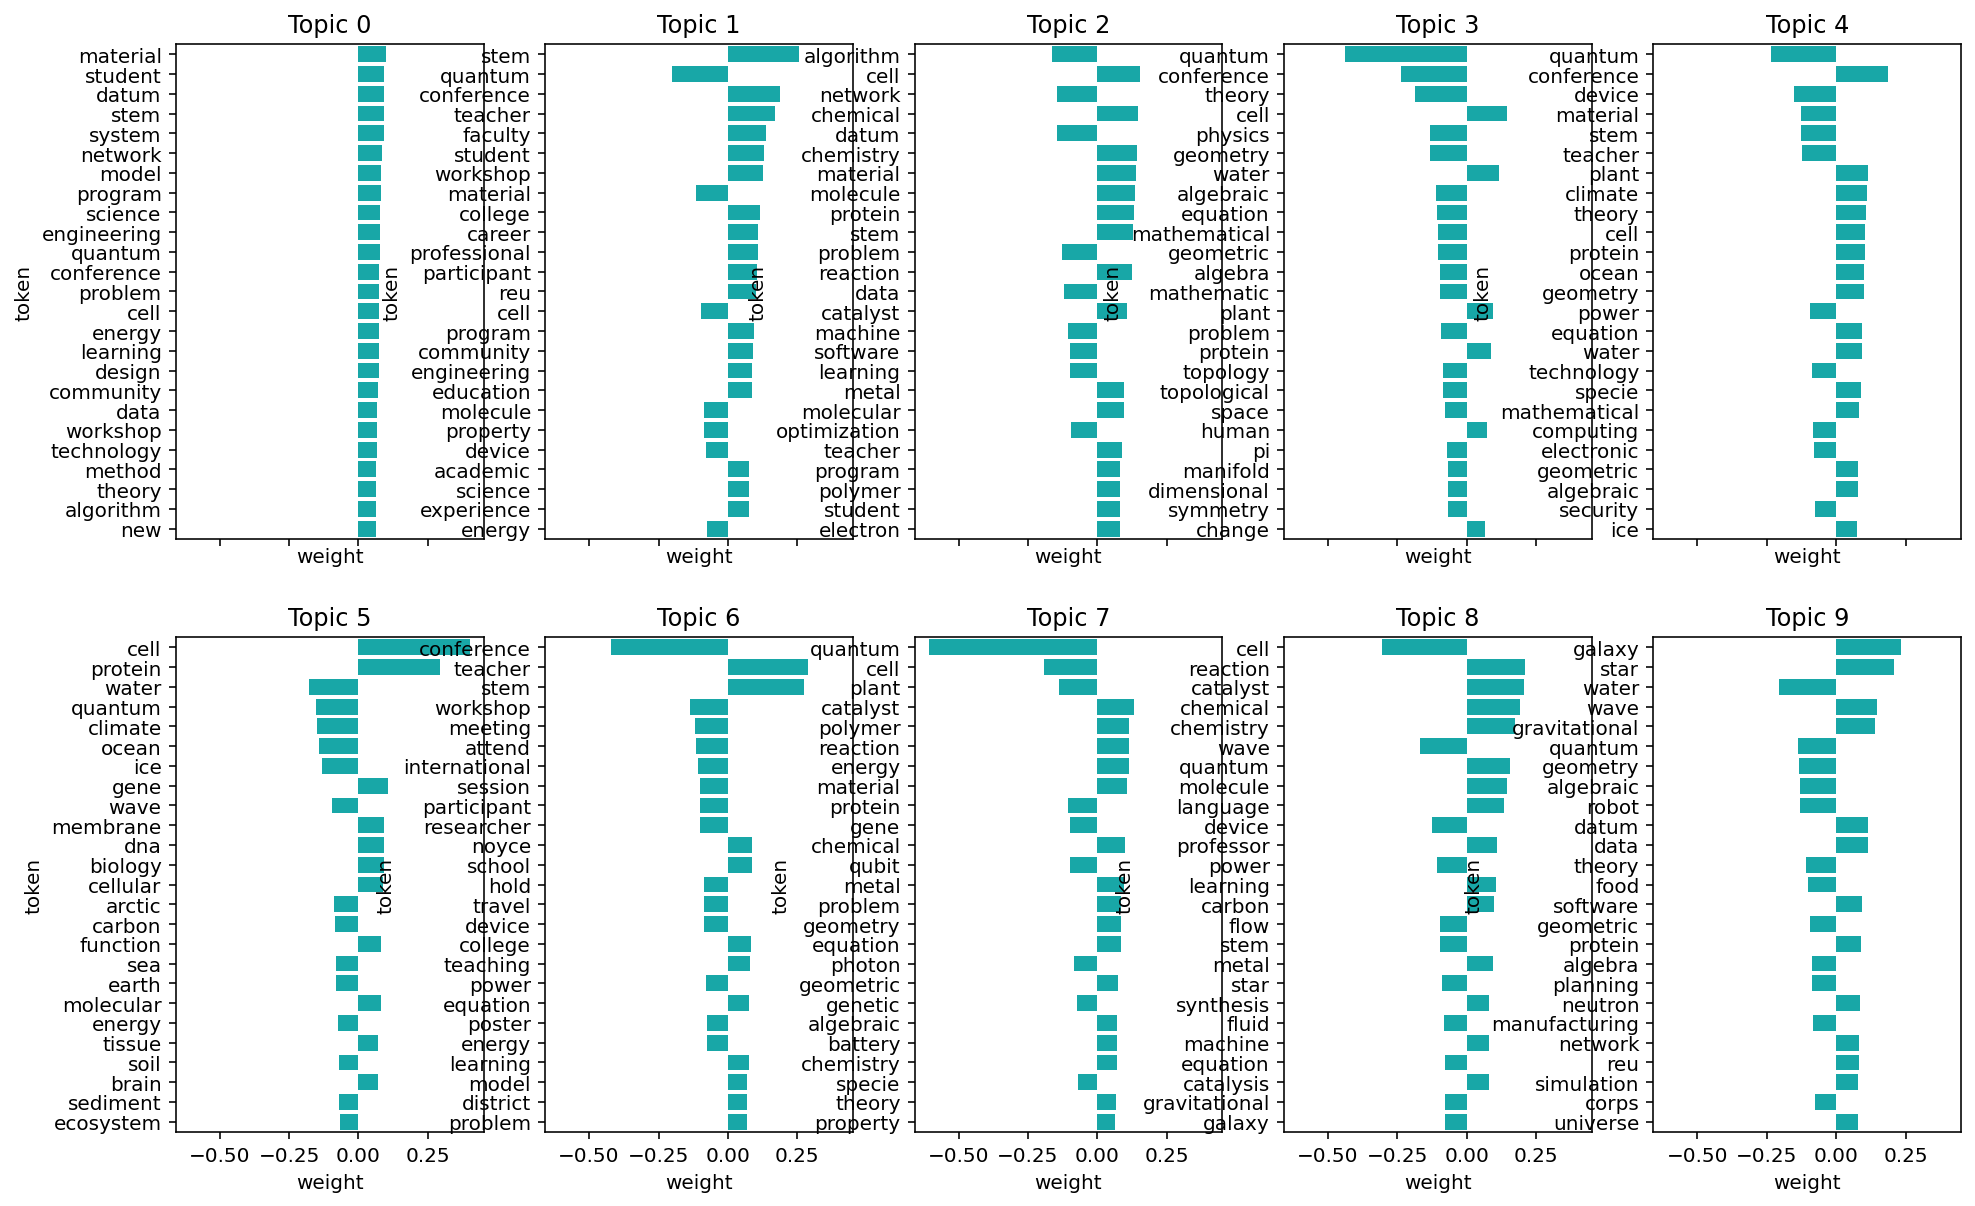

In [23]:
topn = 25

fig, axes = plt.subplots(2, 5, figsize=(16, 10), sharex=True)

for i in range(5):

    #<SOL>
    # Build a dataframe with columns 'token' and 'weight' for topic i
    df = pd.DataFrame(lsi.show_topic(i,topn = topn), columns = ['token', 'weight'])
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title('Topic ' + str(i))
    #<SOL>
    # Build a dataframe with columns 'token' and 'weight' for topic i + 4
    #df = pd.DataFrame( ...
    df = pd.DataFrame(lsi.show_topic(i+5,topn = topn), columns = ['token', 'weight'])
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+5))
    
plt.show()

**Discussion**: 

   - Taking a look at the previous plots, can you find some intuitive topics?
   - Can you distinguish the significance of positive vs negative weights?
   - Which terms would you keep to better characterize the topics: positive, negative, both?
   - What do you think is the role of Topic 0?

You can play with changing the number of topics to check whether you can find more detailed topics. Normally, more detailed topics come at the cost of adding some noisy topics. 

 - Dados los tokens que los caracterizan podemos intuir ciertos topics. El topic 5 hace referencia a temas biológicos; el topic 6 ciertos temas académicos; el topic 2 abarca temas de computer science...
 - Asocio pesos positivos a tokens correlados con el topic en concreto y los negativos los que están ciertamente incorrelados
 - Ambas tienen su peso asociado a información relativa del topic. Con los positivos y negativos mezclados nos queda claro tanto cual es el tema principal del topic como si dos topics son parecidos que "subtopics" diferencian a cada uno de ellos.
 -  El topic 0, lo asocio a uno más general que indica (con un valor de peso en cada token parecido), los temas generales (o topics) que abarca el corpus utilizado.

#### 3.1.2. Displaying document topic information

LSI approximates any document as a linear combination of the topic vectors. We can compute the topic weights for any input corpus entered as input to the lsi model.

Notice that, from the point of view of Gensim, the lsi model constitutes a transformation, just like the tfidf object. This means that:

   - You can use it to obtain the LSI representation of a particular document or to transform a whole corpus.
   - You can use a transformed corpus as document feature representation for another Machine Learning Task. For instance, you could try to solve a classification or regression task using the LSI representation of each document as the input to the classifier/regression model, as you would do with the BoW or TFIDF vectors

As LSI is based on SVD decomposition, the topic representation of any document will generally contain non-zero weights for all topics.

As with other Gensim objects, you can serialize the LSI model for future use. In order to save the model, use the `save` method of the `gensim.models.lsimodel` object.

In [24]:
corpus_lsi = lsi[mycorpus_tfidf]
print(corpus_lsi[0])

[(0, 0.06554881040967536), (1, -0.009132254465023332), (2, 0.0324869260166025), (3, 0.015332495247746835), (4, 0.026624861237908175), (5, 0.051047781838110734), (6, 0.016090506413044537), (7, -0.017624904112788303), (8, 0.000583525683745078), (9, 0.001060791848082242)]


Como vemos, aplicando mi modelo lsi al corpus entero puedo analizar, para cada uno de los documentos del corpus, el peso asociado a cada uno de los "topics" para dicho documento (y ver por tanto cual ase ajusta más o menos al mismo). Tiene sentido ya que el doc 0 habla de temas de biología y temas académicos (tal y como lo hacen el topic 5; los que mas se ajustan a dicho doc).

**Exercise 4**: Try to locate a topic related to *Astrophysics*, and find the most relevant document for such topic. In order to do so, you should take into account whether the relevant tokens for the topic have been assigned positive or negative values in the `topic-tokens` matrix. The *most relevant document* will be that with the largest or smallest component for the topic.

Observe the document text representation to check whether the selected document was reasonably characterized by the topic.

(If you are working with your own dataset, pick another topic from the model you obtained)

In [25]:
#<SOL>
topic9_similarity = []

for i in corpus_lsi:
    topic9_similarity.append(abs(i[9][1]))

max_value = max(topic9_similarity)
index = topic9_similarity.index(max_value)

print('Position of selected document: ' + str(index))
print('Weight of selected document for the topic: ' + str(max_value))
print('')
print(colored('============= Text abstract (lemmas) =============', 'blue'))
print(print(mycorpus[index]))
#</SOL>

Position of selected document: 9417
Weight of selected document for the topic: 0.3113822825112667

============= Text abstract (lemmas) =============
['recent', 'observation', 'advanced', 'laser', 'interferometer', 'gravitational', 'wave', 'observatory', 'aligo', 'advanced', 'virgo', 'avirgo', 'detector', 'merger', 'binary', 'black', 'hole', 'binary', 'neutron', 'star', 'system', 'open', 'field', 'multi', 'messenger', 'astrophysic', 'spark', 'broad', 'range', 'study', 'new', 'test', 'general', 'relativity', 'measurement', 'hubble', 'constant', 'constraint', 'equation', 'state', 'neutron', 'star', 'study', 'r', 'process', 'heavy', 'element', 'production', 'binary', 'neutron', 'star', 'merger', 'add', 'gravitational', 'wave', 'signal', 'binary', 'universe', 'lead', 'stochastic', 'gravitational', 'wave', 'background', 'sgwb', 'discovery', 'enable', 'robust', 'estimate', 'background', 'indicate', 'reach', 'upcoming', 'observation', 'run', 'aligo', 'avirgo', 'sgwb', 'new', 'type', 'gravitat

Como vemos, el documento 9417 es el más asociado al topic 9 (que toca temas de espacio - Astrofísica).

### *3.2. Latent Dirichlet Allocation*

Since we already have computed the dictionary and documents BoW representation using Gensim, computing the topic model is straightforward using the `LdaModel()` function. 

Like the implementation in scikit-learn, Gensim LDA is based on [Online LDA](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.984.3103&rep=rep1&type=pdf). Gensim implementation is:
   - *memory efficient*: the input data (BoW representation) just need to be a Python iterator. This means that the corpus does not have to reside in memory allowing to train with corpus larger than the available RAM. 
   - *distributed*: allows training using multiple cores for faster execution.

Please, refer to [Gensim API documentation](https://radimrehurek.com/gensim/models/ldamodel.html) for more information on the different parameters accepted by the function. Take a look at the possible choices for the parameters related LDA Dirichlet prior hyperparameters `alpha`, and `eta`.

**Important**: Unlike LSI, LDA generative model is based on BoW document representation. Therefore, you should **always** use BoW representation when searching for LDA models.


Implementamos el modelo LDA (que siempre usa representación en tipo BoW de los documentos del corpus) con 20 "topics".

In [26]:
from gensim.models.ldamodel import LdaModel
num_topics = 20

ldag = LdaModel(corpus=mycorpus_bow, id2word=D, num_topics=num_topics)

#### 3.2.1. Displaying topic information

A first visualization of the obtained topics is provided by the show_topics method.

De nuevo, podemos ver los tokens más relevantes para cada topic del modelo LDA:

In [27]:
#Display all topics including 10 most relevant tokens per topic
ldag.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  '0.018*"quantum" + 0.010*"system" + 0.010*"physics" + 0.009*"material" + 0.009*"student" + 0.008*"new" + 0.008*"property" + 0.008*"state" + 0.008*"field" + 0.007*"magnetic"'),
 (1,
  '0.013*"fault" + 0.011*"equation" + 0.009*"earthquake" + 0.009*"model" + 0.008*"study" + 0.007*"problem" + 0.006*"mathematical" + 0.006*"student" + 0.006*"develop" + 0.005*"science"'),
 (2,
  '0.009*"model" + 0.007*"earth" + 0.007*"study" + 0.006*"process" + 0.006*"ice" + 0.006*"new" + 0.005*"high" + 0.005*"measurement" + 0.005*"provide" + 0.005*"surface"'),
 (3,
  '0.022*"cell" + 0.008*"develop" + 0.007*"system" + 0.007*"technology" + 0.005*"tissue" + 0.005*"device" + 0.005*"development" + 0.005*"provide" + 0.005*"new" + 0.004*"patient"'),
 (4,
  '0.013*"study" + 0.012*"child" + 0.011*"social" + 0.011*"drug" + 0.009*"health" + 0.008*"group" + 0.007*"postdoctoral" + 0.006*"scientific" + 0.006*"human" + 0.006*"scientist"'),
 (5,
  '0.017*"protein" + 0.009*"student" + 0.009*"cell" + 0.008*"chemical" +

**Exercise 5:** Like you did for the LSI model, provide a graphic interpretation of token composition of the topics you obtained.

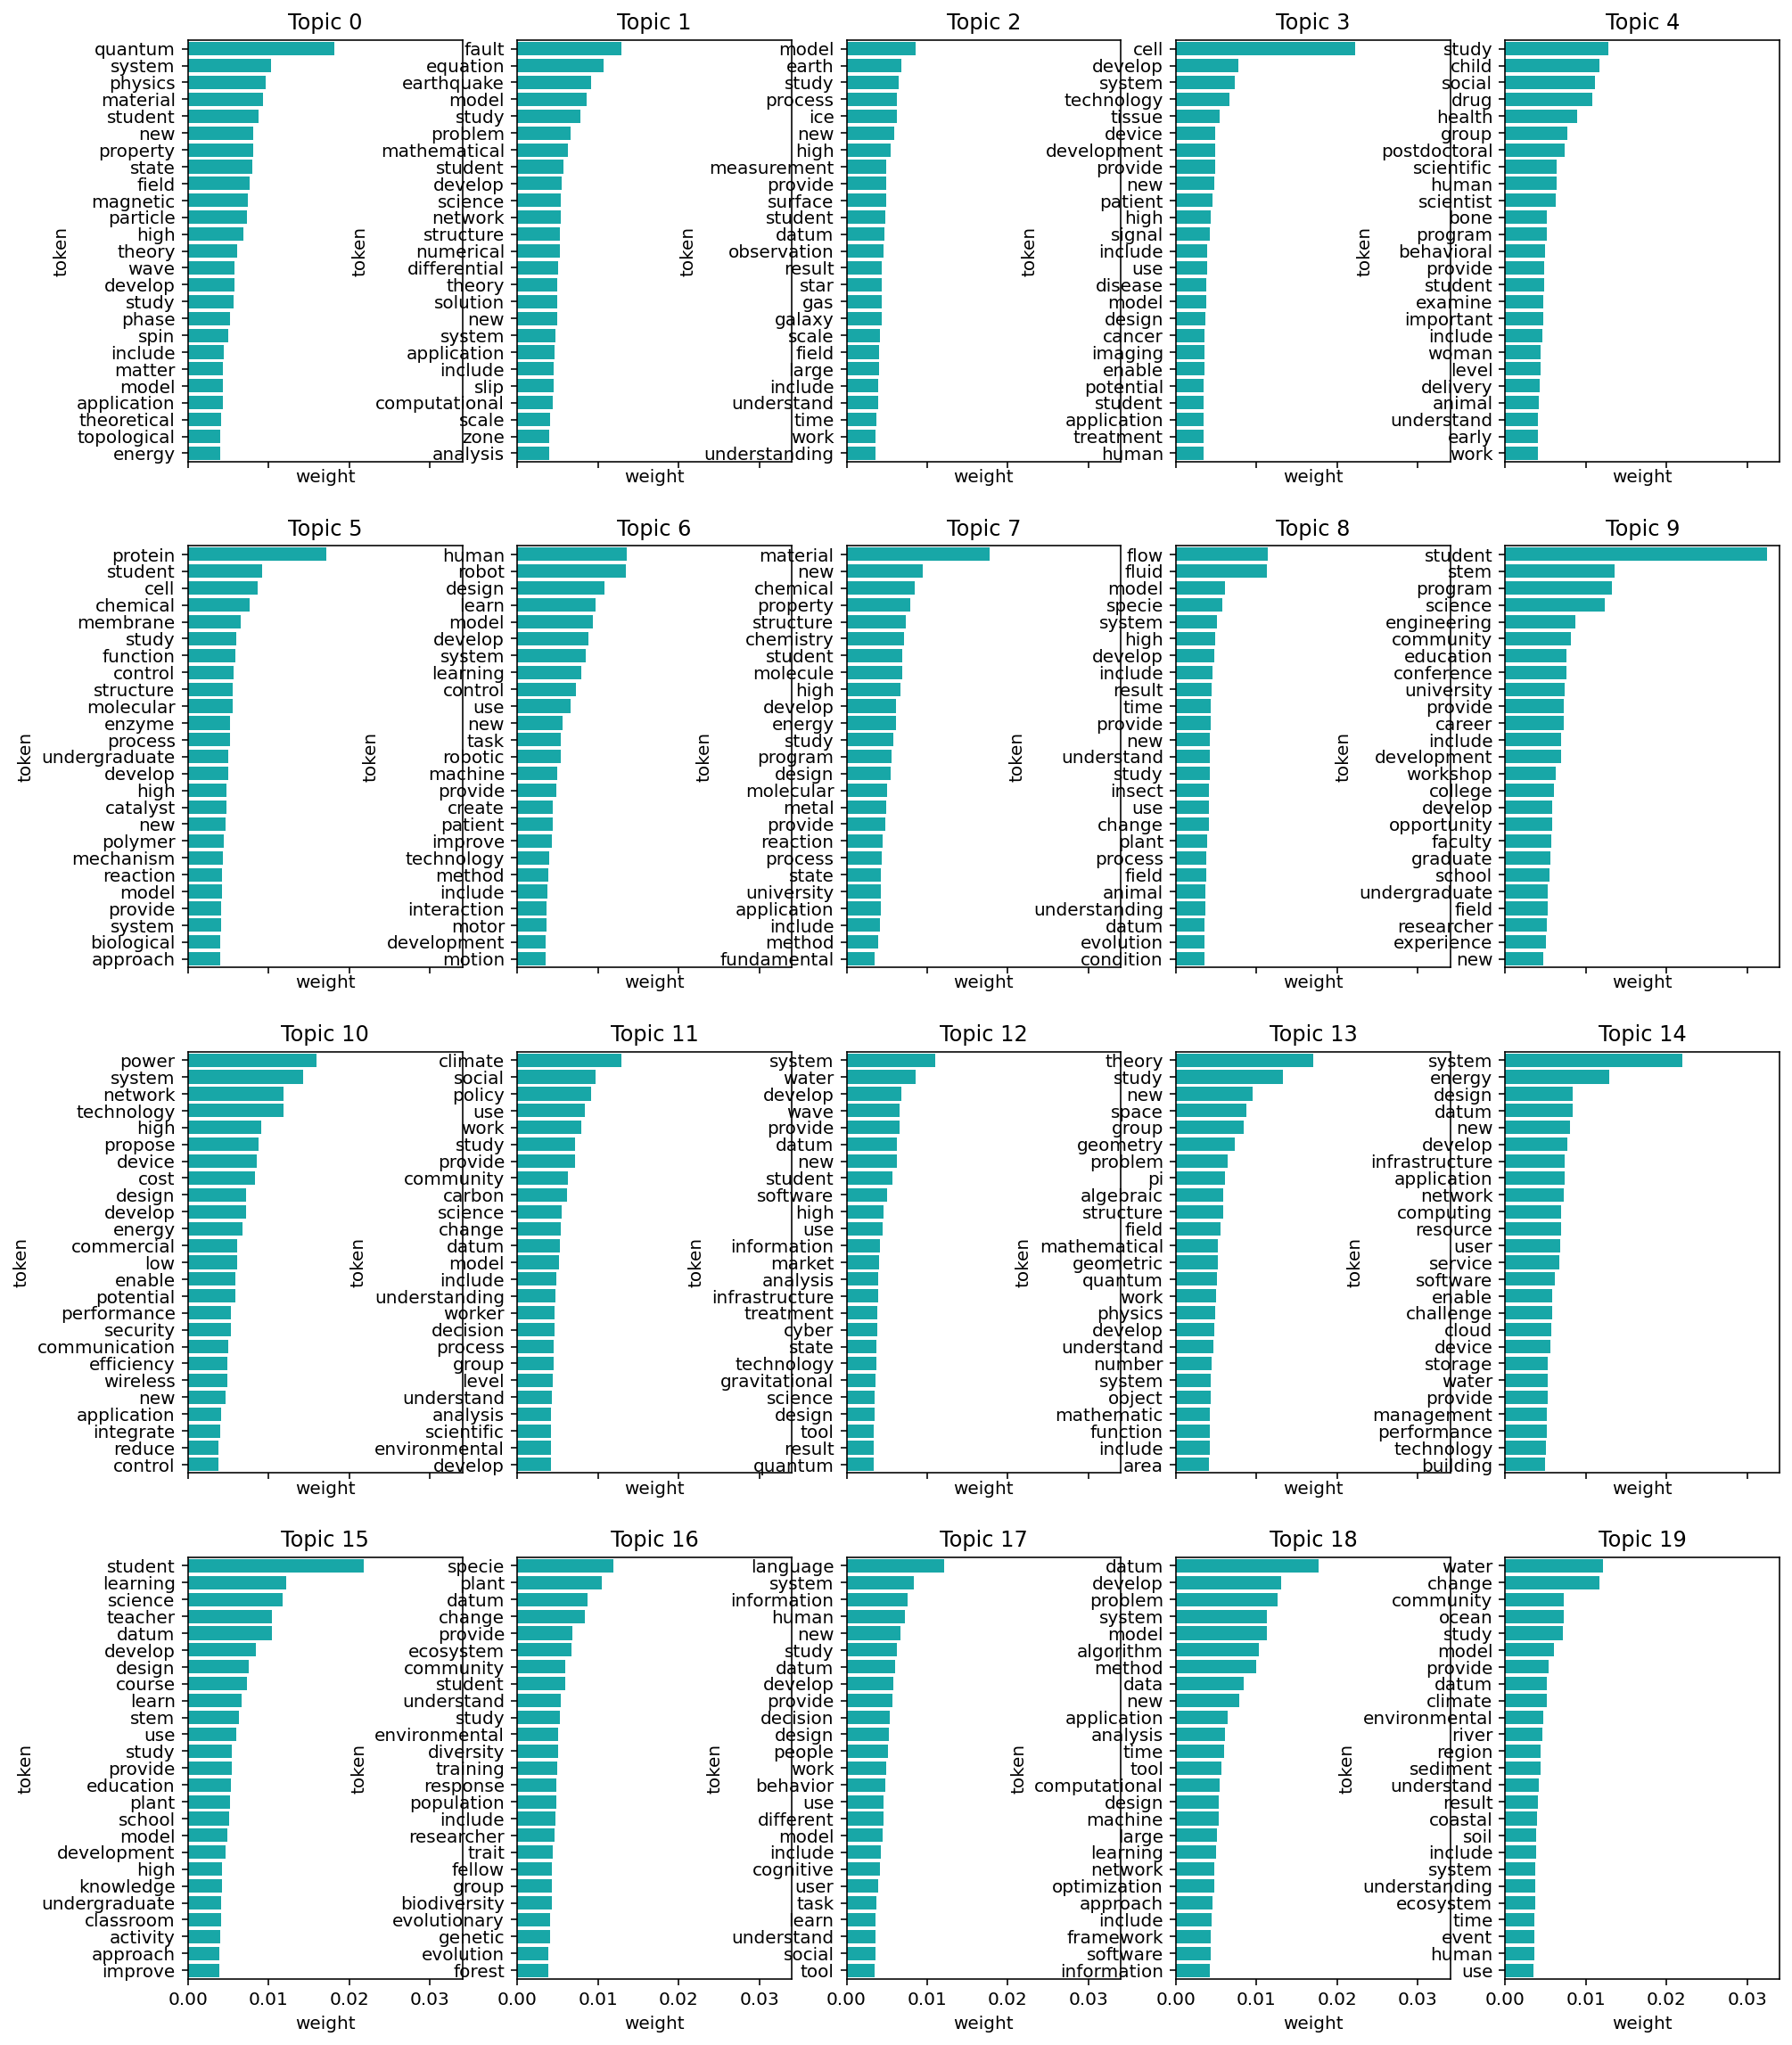

In [28]:
#<SOL>
topn = 25

fig, axes = plt.subplots(4, 5, figsize=(16, 20), sharex=True)

for i in range(5):


    a = ldag.show_topic(i, topn=25)
    b = ldag.show_topic(i+5, topn=25)
    c = ldag.show_topic(i+10, topn=25)
    d = ldag.show_topic(i+15, topn=25)

    token_i = []
    weight_i = []
    token_i_4 = []
    weight_i_4 = []
    token_i_10 = []
    weight_i_10 = []
    token_i_15 = []
    weight_i_15 = []

    for j in range(topn):
        token_i.append(a[j][0])
        weight_i.append(a[j][1])
        token_i_4.append(b[j][0])
        weight_i_4.append(b[j][1])
        token_i_10.append(c[j][0])
        weight_i_10.append(c[j][1])
        token_i_15.append(d[j][0])
        weight_i_15.append(d[j][1])

    df = pd.DataFrame(data = (token_i,weight_i))
    df = df.T

    df.columns = ['token', 'weight']

    df['weight'] = df['weight'].astype('float64')

    #<SOL>
    # Build a dataframe with columns 'token' and 'weight' for topic i
    #df = pd.DataFrame( ...
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title('Topic ' + str(i))
    #<SOL>
    # Build a dataframe with columns 'token' and 'weight' for topic i + 4
    #df = pd.DataFrame( ...
    df = pd.DataFrame(data = (token_i_4,weight_i_4))
    df = df.T
    df.columns = ['token', 'weight']
    df['weight'] = df['weight'].astype('float64')
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+5))

    df = pd.DataFrame(data = (token_i_10,weight_i_10))
    df = df.T
    df.columns = ['token', 'weight']
    df['weight'] = df['weight'].astype('float64')
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[2][i])
    axes[2][i].set_title('Topic ' + str(i+10))


    df = pd.DataFrame(data = (token_i_15,weight_i_15))
    df = df.T
    df.columns = ['token', 'weight']
    df['weight'] = df['weight'].astype('float64')
    #</SOL>
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[3][i])
    axes[3][i].set_title('Topic ' + str(i+15))

#</SOL>

**Discussion**:

   - Having a look a the token composition of the obtained topics, do you consider all of them equally informative, in the sense of semantic relevance?
   - Can you think of any strategy to improve the quality of the topics in terms of their token description?

- Todos los topics son relativamente iguales en términos de información que los describa. Todos cuentan con pesos parecidos en relación a sus primeros 25 tokens de referencia.
- Filtrar un peso mínimo en los tokens ; con ello tendríamos más claro en que se centra dicho topic.

#### 3.2.2. LDA model visualization: pyLDAvis

A more useful visualization is provided by the python LDA visualization library, pyLDAvis.

To execute the next code fragment you need to have pyLDAvis installed.

A brief but complete description of the information provided by LDAvis can be found [here](https://pahulpreet86.github.io/interpreting-topic-model-visualization-ldavis-package/).

---
**Important:**

Note that pyLDAvis sorts the topics according to their size in the model, so there is not a direct correspondence between the order of topics in the ldag model and pyLDAvis topic numbering

---

In [29]:
# Install of a visualizer for LDA
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=7fd390b810f8c48a512e470693c0bfb5fc61a03185685da1fa3ee3d0fd95edbe
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [30]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(ldag, mycorpus_bow, D)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


Con esto podemos ver diversas cosas:

    - Que topics se parecen más entre sí (las bolas más cercanas).
    - Que topics cuentan con más tokens dentro de su correlación.
    - Tokens más importantes dentro de cada topic
    - Etc...

#### 3.2.3. Displaying document topic information

**Exercise 6**: If you have completed the exercises proposed in the notebook, you will already understand how you can work with the ldag model created in the previous subsection, and how it can be used to transform the document corpus.

   - Obtain the vector representation of the corpus according to the assignment of documents to topics provided by the model.

   - Obtain and view some of the most relevant documents for a topic of your choice

**Exercise 7**: Build a function that returns the most relevant projects for a given topic


Juntamos el ejercicio 6 dentro de la función del 7 directamente:

In [33]:
def most_relevant_documents(ldag, topicid, corpus_bow, ndocs=10):
    """This function returns the most relevant documents in corpus_bow
    
    : ldag: The trained topic model object provided by gensim
    : topicid: The topic for which we want to find the most relevant documents
    : corpus_bow: The BoW representation of documents in Gensim format
    : ndocs: Number of most relevant documents to return
    
    : Returns: A list with the identifiers of the most relevant documents
    """

    print('Computing most relevant documents for Topic', topicid)
    print('Topic composition is:')
    print(ldag.show_topic(topicid))
    
    #<SOL>
    corpus_ldag = ldag[corpus_bow]
    docs_id = []

    for x in range(ndocs):
        doc = 0
        val = 0
        for i in range(len(corpus_ldag)):
            for j in corpus_ldag[i]:
                if j[0] == topicid and j[1] > abs(val) and not i in docs_id:
                    doc = i
                    val = j[1]
        docs_id.append(doc)
    return docs_id
    
    #</SOL>
    
#To test the function we will find the most relevant projects for one of the topics
project_id = most_relevant_documents(ldag, 5, mycorpus_bow, ndocs=3)

#Print titles of selected projects
for idproject in project_id:
    print('\n', ' '.join(mycorpus[idproject]))

Computing most relevant documents for Topic 5
Topic composition is:
[('protein', 0.017132571), ('student', 0.009220735), ('cell', 0.008674392), ('chemical', 0.007705667), ('membrane', 0.006543814), ('study', 0.005952825), ('function', 0.005860976), ('control', 0.005653994), ('structure', 0.0055351867), ('molecular', 0.0055162543)]

 factory cell organize process place distinct room organelle project create model system understand cell utilize compartment distinct wall design rule formation function compartment establish rule test construct membraneless organelle house enzyme direct series reaction project focus effort foster diverse stem workforce student recruiting training teaching level graduate undergraduate student recruit outreach activity enzyme develop middle school student summer research experience provide local high school organelle m organelle provide spatial temporal organization selective phase separation important cell signal transcriptional control stress response robus

En mi caso, el topic 5 (para usar uno cualquiera de ejemplo) toca temas de proteinas, celulas, química, estudios.. Vemos como los 3 documentos que printea la función tienen que ver con temas asociados a dicho topic, comprobando así un correcto funcionamiento del mismo.

#### 3.2.4. Using coherence to adjust the number of topics

One of the key questions when dealing with topic models is how to adjust the number of topics. There is usually a lot of trial and error in the process:

   - A too large number of topics allows to discover very detailed topics at the cost of the encountering also some unimportant and redundant topics
   - A small number normally provides semantic meaningful topics, but probably too broad. In addition to this, *garbage* topics can be seen even in this case.

A useful tool for selecting LDA hyperparameters is to use [Coherence models](https://radimrehurek.com/gensim/models/coherencemodel.html). But note that even these metrics are subject to a lot of controversy:
   - First of all, topics and model quality can be perceived in different ways by different people.
   - Second, some studies show that some coherence functions are not well correlated to human intuition when compared to the opinion of a pool of evaluators.


Un tema interesante es como decidir, dado mi corpus, el número de topics para analizar el mismo. Por un lado, un número muy grande me daría paso a topics muy específicos con mucho detalle al documento pero también nacerían topics completamente "basura" o redundantes. Por otro lado, un número muy bajo dará topics importantes a nivel semántico pero posiblemente demasiado amplio (de manera que no clasifica o crear regiones demasiado buenas entre documentos).

Una buena forma de obtener los hiperparámetros de un modelo LDA es con los "Modelos de Coherencia" sin embargo debemos tener en cuenta que la calidad de los resultados es relativamente "subjetiva" y, tener en cuenta que ciertos estudios científicos indican que las funciones de coherencia no se correlan demasiado con la intuición humana (a tener en cuenta).

In [34]:
from gensim.models.coherencemodel import CoherenceModel

coherencemodel = CoherenceModel(ldag, texts=mycorpus, dictionary=D, coherence='c_v')
print('The coherence of the trained model is', coherencemodel.get_coherence())

The coherence of the trained model is 0.4022365997779069


**Exercise 8**: Evaluate the evolution of topic coherence as a function of the number of topics. You can use, e.g.,

   - `n_topics = [5, 10, 15, 20, 25, 50]`. If the coherence does not achieve a local maximum, increase the number of topics to observe 
   - Different coherence measures are implemented in Gensim. Be aware that some coherence models (like `c_v`) take a significant time to compute.


Estimating coherence for a model with 5 topics: 0.3437243584937332


Estimating coherence for a model with 10 topics: 0.3684782472656971


Estimating coherence for a model with 15 topics: 0.40816220857349683


Estimating coherence for a model with 20 topics: 0.3902907433824358


Estimating coherence for a model with 25 topics: 0.3908045152365456


Estimating coherence for a model with 30 topics: 0.41237537655754847


Estimating coherence for a model with 35 topics: 0.42438500660736256


Estimating coherence for a model with 40 topics: 0.4400967847258938


Estimating coherence for a model with 45 topics: 0.4121444384242649


Estimating coherence for a model with 50 topics: 0.417588244257462


Estimating coherence for a model with 55 topics: 0.42144384613863506


Estimating coherence for a model with 60 topics: 0.4186063968477002


Estimating coherence for a model with 65 topics: 0.42077794979375355


Estimating coherence for a model with 70 topics: 0.4067495830012958


Estimating coherence for a model with 75 topics: 0.4230379259511384
Estimating coherence for a model with 80 topics: 0.4034032913892595


Text(0, 0.5, 'Average coherence')

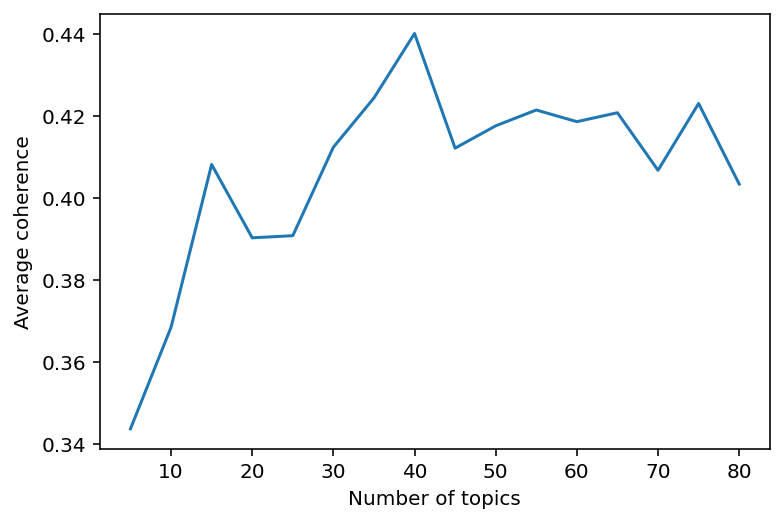

In [35]:
#<SOL>

n_topics = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
coherence_evolution = []

for i in n_topics:
    
    ldag_topics = LdaModel(corpus=mycorpus_bow, id2word=D, num_topics=i)
    coherencemodel_topics = CoherenceModel(ldag_topics, texts=mycorpus, dictionary=D, coherence='c_v')
    coherence_evolution.append(coherencemodel_topics.get_coherence())
    print('Estimating coherence for a model with ' + str(i) + ' topics: ' + str(coherencemodel_topics.get_coherence()))

fig, ax = plt.subplots()
ax.plot(n_topics, coherence_evolution)
ax.set_xlabel('Number of topics')
ax.set_ylabel('Average coherence')

Apart from estimating the average coherence of the model topics, we can also use the method `get_coherence_per_topic` to select the topics with largest coherence.


Como vemos, a partir de aproximadamente, los 25 topics, el "topic coherence" se mantiene estable variando levemente entre 0.40 y 0.44. Con esto podemos deducir que 25 topics, es un buen número de topics para el corpus propuesto.

#### 3.2.5. Training LDA with Mallet

As we have already explained, Mallet is a Java-based LDA implementation. It is based on Monte Carlo optimization which allows high parallelization. In addition, it generally offers very good results.

The recommended way to run Mallet is to install the executables in a local environment to be able to use it without any overhead as it happens when we use the wrapper provided by Gensim. Said wrapper requires generating auxiliary text files that are later used for Mallet training, and then the Mallet output must be parsed to retrieve the relevant information. Therefore, for a more efficient application it is more appropriate to launch Mallet executables directly. If you want to integrate such topic modeling into a Python application, you would just have to use one of the different tools that allow you to launch external processes from Python.

Despite the previous recommendation, for greater simplicity, within this notebook we will resort to the gensim wrapper, which allows us to make use of practically all the tools that we have already reviewed. However, running Mallet requires its installation in Google Colab, as well as a Java virtual machine, which we do in the following cells. We acknowledge here [this Github repository](https://github.com/polsci/colab-gensim-mallet/) from which we obtained the code.


Usaremos LDA con Mallet (implementación óptima y con buenos resultados de LDA en java):

In [36]:
import os       #importing os to set environment variable
def install_java():
    !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
    !java -version       #check java version
install_java()

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [37]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-11-28 23:10:47--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-11-28 23:10:47--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  65.3MB/s    in 0.2s    

2022-11-28 23:10:47 (65.3 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [38]:
os.environ['MALLET_HOME'] = 'mallet-2.0.8'
mallet_path = 'mallet-2.0.8/bin/mallet' # you should NOT need to change this 

Now we are ready to train the LDA model in pretty much the same way we did for Mallet. We adjusted two additional Mallet parameters from their default values:

   - alpha: A priori hyperparameter for the Dirichlet distribution for generating the document topic distributions
   - iterations: To get a faster execution we reduce it to 100 from its default value of 1000. In principle, more iterations provide a more accurate solution.

It should be noted that Mallet has a lot of hyperparameters that can be adjusted for data import and model training. Many but not all of them are available when using the Gensim wrapper.

Cargamos el modelo con nuestro corpus y el diccionario del mismo. Este modelado LDA basado en mallet consta de dos nuevos hiperparámetros: alpha, asociado a la generación de la distribución de Dirichlet y iterations, a mayor número, mejor solución.

In [39]:
from gensim.models.wrappers import LdaMallet
ldamallet = LdaMallet(mallet_path, corpus=mycorpus_bow, num_topics=20, id2word=D, alpha=5, iterations=100)


To visualize the topics obtained by LDA using Mallet, you can use any of the visualization strategies already studied in the previous subsections. However, if you wish to use pyLDAvis, it is important that you convert `ldamallet` model to an object that is fully compatible with Gensim

In [40]:
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel
ldagensim = malletmodel2ldamodel(ldamallet)

In [41]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(ldagensim, mycorpus_bow, D)
pyLDAvis.display(vis_data)

De nuevo, podemos ver diversas cosas:

    - Que topics se parecen más entre sí (las bolas más cercanas).
    - Que topics cuentan con más tokens dentro de su correlación.
    - Tokens más importantes dentro de cada topic
    - Etc...

You can also use functions to compute the coherence of the topics. The following cell computes the coherence of the model trained with Mallet. You can compare this value to the coherence obtained using the Gensim LDA implementation.

In [ ]:
coherencemodel = CoherenceModel(ldagensim, texts=mycorpus, dictionary=D, coherence='c_v')
print(coherencemodel.get_coherence())

0.5175658058346363


En primera instancia ya vemos mejores resultados en el modelo de coherencia, sin embargo, hagamos un barrido en función del número de topics como en el LDA anterior:

**Exercise 9**: Compute the coherence of the LDA models trained using the Mallet implementation for different number of topics, and compare this result with the observed coherences for the Gensim implementation.

Estimating coherence for a model with 5 topics: 0.4267187663941385
Estimating coherence for a model with 10 topics: 0.47173507859513303
Estimating coherence for a model with 15 topics: 0.5033128859775317
Estimating coherence for a model with 20 topics: 0.4942240204485591
Estimating coherence for a model with 25 topics: 0.5407215984367797
Estimating coherence for a model with 30 topics: 0.5336595349786319
Estimating coherence for a model with 35 topics: 0.5365078253103651
Estimating coherence for a model with 40 topics: 0.5441763040027581
Estimating coherence for a model with 45 topics: 0.5299530072507618
Estimating coherence for a model with 50 topics: 0.5283469935455304
Estimating coherence for a model with 55 topics: 0.5263995640667583
Estimating coherence for a model with 60 topics: 0.5449570908990027
Estimating coherence for a model with 65 topics: 0.5207241591447255
Estimating coherence for a model with 70 topics: 0.5230759874786448
Estimating coherence for a model with 75 topics:

Text(0, 0.5, 'Average coherence')

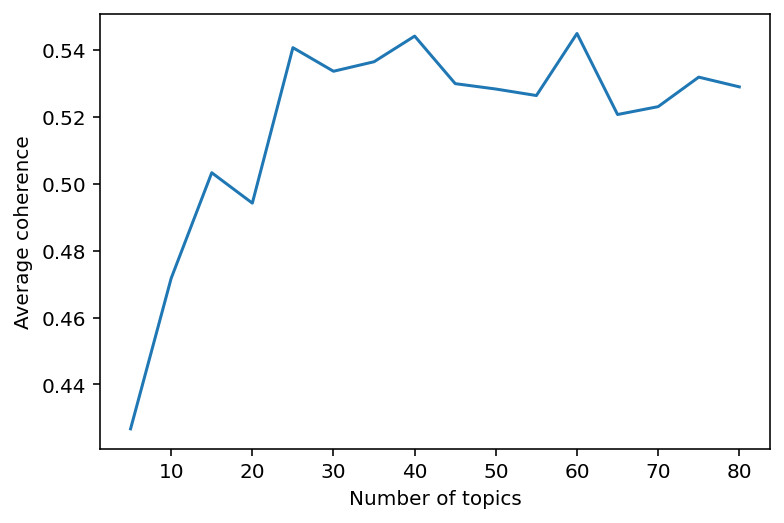

In [44]:
#<SOL>

n_topics = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
coherence_evolution = []

for i in n_topics:
    
    ldamallet = LdaMallet(mallet_path, corpus=mycorpus_bow, num_topics=i, id2word=D, alpha=5, iterations=100)
    coherencemodel_topics = CoherenceModel(ldamallet, texts=mycorpus, dictionary=D, coherence='c_v')
    coherence_evolution.append(coherencemodel_topics.get_coherence())
    print('Estimating coherence for a model with ' + str(i) + ' topics: ' + str(coherencemodel_topics.get_coherence()))

fig, ax = plt.subplots()
ax.plot(n_topics, coherence_evolution)
ax.set_xlabel('Number of topics')
ax.set_ylabel('Average coherence')

Como vemos, no solo el resultado es notablemente mejor que para el LDA anterior (comprobando la eficiente implementación con Mullet) sino quer aparete, es relativamente más estable a partir de los, aproximadamente, 30 topics. A partir de este valor, se mantiene estable entre 0.52 y 0.54.

#### 3.2.6. Distances between LDA topics

The following piece of code computes the distances between the topic models `ldag` and `ldagensim` (the one we computed with Mallet implementation).

Taking a look at the plotted matrix, we can see that some pairs of topics have a relatively low distance, and could be thougt as equivalent topics if we were to match topics from both models.

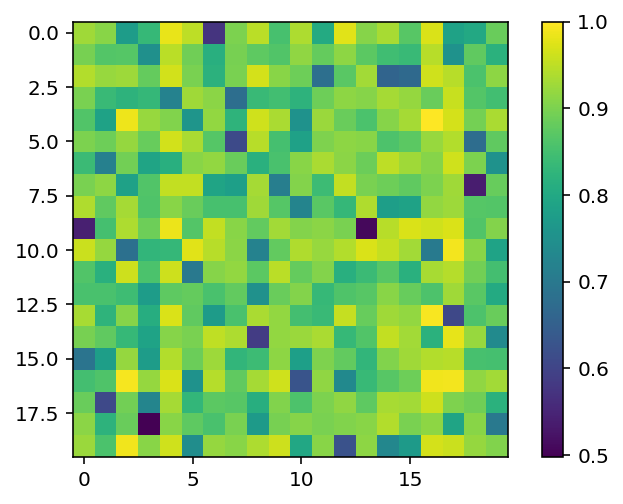

In [45]:
distmat, annotations = ldag.diff(ldagensim, distance='hellinger', num_words=100)

plt.imshow(distmat)
plt.colorbar()
plt.show()

**Exercise 10:** Find the closest topics from models `ldag` and `ldagensim`, and print their topic composition to check whether they seem similar from the perspective of the most relevant tokens for each topic.

In [46]:
distmat, annotations = ldag.diff(ldagensim, distance='hellinger', num_words=100)


In [73]:
#<SOL>
print('The Hellinger distance between the two most similar topics is ' + str(distmat.min()))
print('')

v = np.where(distmat == distmat.min())
first_position = v[0][0]
second_position = v[1][0]

print('Topic 18 from the first model')
print(ldag.show_topic(18, topn=10))

print('')

print('Topic 3 from the second model')
print(ldagensim.show_topic(3, topn=10))
#</SOL>

The Hellinger distance between the two most similar topics is 0.49799546595909655

Topic 18 from the first model
[('datum', 0.017728647), ('develop', 0.013034956), ('problem', 0.0125497505), ('system', 0.01128433), ('model', 0.011282262), ('algorithm', 0.010272684), ('method', 0.009908422), ('data', 0.008423556), ('new', 0.007861788), ('application', 0.0063955914)]

Topic 3 from the second model
[('datum', 0.03262840722037776), ('develop', 0.019383143152079906), ('model', 0.01839968752615574), ('method', 0.017276734648327432), ('algorithm', 0.016495550037664262), ('data', 0.015526044136930506), ('computational', 0.012938370114108755), ('analysis', 0.012045587701922275), ('problem', 0.011815417236280448), ('learning', 0.01078313757218983)]


La distancia más cercana entre dos topics usando los modelos LDA y LDAGENSIM, es de aproximadamente 0.5 y se asocia a los topics 18 y 3 del primer y segundo modelo respectivamente. Viendo los tokens asociados a cada topic (lo podemos ver justo arriba), encontramos una buena cantidad de tokens iguales entre ambos, lo que nos da a comprender porque ambos topics son tan parecidos.